In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("train.csv")

In [ ]:
df.info()

In [ ]:
df = df.drop(["Order_Date", "Time_Orderd", "Time_Order_picked", "Weatherconditions", 
              "Road_traffic_density", "Vehicle_condition", "multiple_deliveries", 
              "Festival", "City"], axis=1)

In [5]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
def distance(rest_lat, rest_lon, del_lat, del_lon):
    dist_lat = (del_lat - rest_lat) * (np.pi / 180)
    dist_lon = (del_lon - rest_lon) * (np.pi / 180)
    a = pow(np.sin(dist_lat / 2), 2) + np.cos(rest_lat * (np.pi/180)) * np.cos(del_lat * (np.pi / 180)) * pow(np.sin(dist_lon / 2), 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return 6371 * c

In [8]:
for i in range(len(df)):
    df.loc[i, 'distance'] = distance(df.loc[i, "Restaurant_latitude"], 
                                     df.loc[i, "Restaurant_longitude"],
                                     df.loc[i, "Delivery_location_latitude"],
                                     df.loc[i, "Delivery_location_longitude"])

In [ ]:
df["Time_taken(min)"] = df["Time_taken(min)"].str.replace("min", "")
df["Time_taken(min)"] = df["Time_taken(min)"].str.replace("(", "")
df["Time_taken(min)"] = df["Time_taken(min)"].str.replace(")", "")

In [129]:
df["Time_taken(min)"] = df["Time_taken(min)"].astype("int")

In [132]:
#df["Delivery_person_Age"] = df["Delivery_person_Age"].astype("float")

In [ ]:
fig = px.scatter(df, x="distance", y="Time_taken(min)", size="Time_taken(min)", trendline="ols")
fig.show()

In [ ]:
plt.scatter(df["Time_taken(min)"], df["distance"])
plt.show()

In [ ]:
fig = px.box(df, x="Type_of_vehicle", y="Time_taken(min)", color="Type_of_order")
fig.show()

In [15]:
X = np.array(df[["Delivery_person_Age", "Delivery_person_Ratings", "distance"]])
y = np.array(df[["Time_taken(min)"]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4242)

In [17]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(3, 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10


2023-05-24 23:36:16.022485: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


41033/41033 [==============================] - 51s 1ms/step - loss: 69.3854
Epoch 2/10
41033/41033 [==============================] - 49s 1ms/step - loss: 63.9325
Epoch 3/10
41033/41033 [==============================] - 49s 1ms/step - loss: 61.2965
Epoch 4/10
41033/41033 [==============================] - 49s 1ms/step - loss: 60.5055
Epoch 5/10
41033/41033 [==============================] - 49s 1ms/step - loss: 59.6509
Epoch 6/10
41033/41033 [==============================] - 49s 1ms/step - loss: 59.2512
Epoch 7/10
41033/41033 [==============================] - 49s 1ms/step - loss: 59.3134
Epoch 8/10
41033/41033 [==============================] - 49s 1ms/step - loss: 59.0554
Epoch 9/10
41033/41033 [==============================] - 49s 1ms/step - loss: 58.5425
Epoch 10/10
41033/41033 [==============================] - 49s 1ms/step - loss: 58.5398


In [20]:
model.save("FDTmodel.h5")

In [21]:
scores = model.evaluate(X_test, y_test)
scores = round((scores), 2)
print("Test Accuracy: ", scores)

143/143 [==============================] - 0s 968us/step - loss: 60.9955
Test Accuracy:  61.0


In [22]:
a = 37
b = 4.9
c = 3.025149
test = np.array([[a,b,c]])
print(model.predict(test))

1/1 [==============================] - 0s 249ms/step
[[23.188303]]


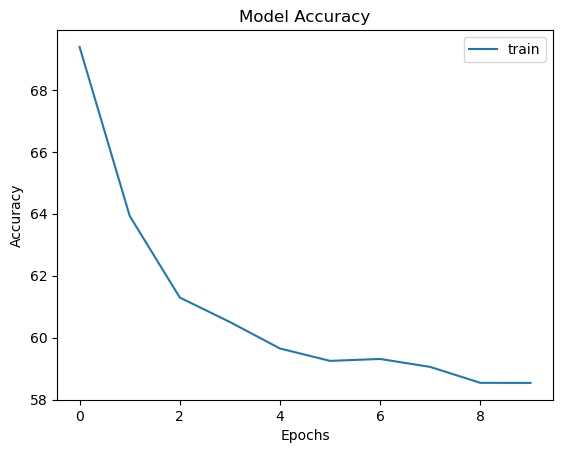

In [26]:
plt.figure()
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train"])
plt.show()